## REGRESSION ANALYSIS

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Absenteeism_preprocessed.csv')

In [3]:
data.head()

,Reason1,Reason2,Reason3,Reason4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Months,Week Day
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3


In [4]:
df = data.copy()

## Selecting Features and Targets

In [5]:
# since we are about to perform logistic regression
#Its better to allot some targets, here 'ABseenteeism Time in Hours' will be divided into 2 categories.
#Here we the categories will be based upon Median.
targets = np.where(df['Absenteeism Time in Hours']>df['Absenteeism Time in Hours'].median(),1,0)
df['Excessive Absenteeism'] = targets

In [6]:
df=df.drop(['Date','Absenteeism Time in Hours'],axis=1)

In [7]:
df.head()

,Reason1,Reason2,Reason3,Reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Months,Week Day,Excessive Absenteeism
0,0,0,0,1,289,36,33,239.554,30,0,2,1,7,1,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,7,1,0
2,0,0,0,1,179,51,38,239.554,31,0,0,0,7,2,0
3,1,0,0,0,279,5,39,239.554,24,0,2,0,7,3,1
4,0,0,0,1,289,36,33,239.554,30,0,2,1,7,3,0


In [8]:
df.iloc[:,:-1]

,Reason1,Reason2,Reason3,Reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Months,Week Day
0,0,0,0,1,289,36,33,239.554,30,0,2,1,7,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,7,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,7,2
3,1,0,0,0,279,5,39,239.554,24,0,2,0,7,3
4,0,0,0,1,289,36,33,239.554,30,0,2,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,179,22,40,237.656,22,1,2,0,5,2
696,1,0,0,0,225,26,28,237.656,24,0,1,2,5,2
697,1,0,0,0,330,16,28,237.656,25,1,0,0,5,3
698,0,0,0,1,235,16,32,237.656,25,1,0,0,5,3


In [9]:
unscaled_inputs = df.iloc[:,:-1]
targets = df.iloc[:,-1]

## Standardize the input

In [10]:
from sklearn.preprocessing import StandardScaler
absenteeism_scaler = StandardScaler()

In [11]:
absenteeism_scaler.fit(unscaled_inputs)
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [12]:
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ...,  0.26848661,
         0.18272635, -0.68370352],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.58968976,
         0.18272635, -0.68370352],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.58968976,
         0.18272635, -0.00772546],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ..., -0.58968976,
        -0.3882935 ,  0.66825259],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.58968976,
        -0.3882935 ,  0.66825259],
       [-0.57735027, -0.09298136, -0.31448545, ...,  0.26848661,
        -0.3882935 ,  0.66825259]])

In [13]:
scaled_inputs.shape

(700, 14)

# Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size = 0.2, random_state = 0)

# Training the Logistic Regression model 

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Prediction and Analysis

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
predictions = pd.DataFrame(y_pred)
predictions.columns= ['Predictions']
pd.options.display.max_columns=None
pd.options.display.max_rows=None
display(predictions)

,Predictions
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [18]:
classifier.score(X_train,y_train)

0.7732142857142857

In [19]:
classifier.score(X_test,y_test)

0.7928571428571428

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[58, 14],
       [15, 53]], dtype=int64)

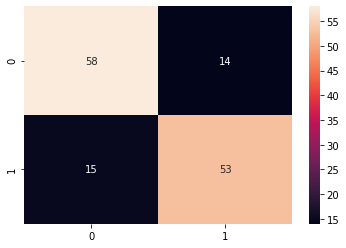

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True)